In [1]:
!# pip install numpy matplotlib pandas ipympl    # not needed if running in nix shell or docker with docker.io/cschranz/gpu-jupyter:v1.9_cuda-12.6_ubuntu-24.04_python-only

In [2]:
%matplotlib ipympl
import matplotlib


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

In [3]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

## Axeses indices

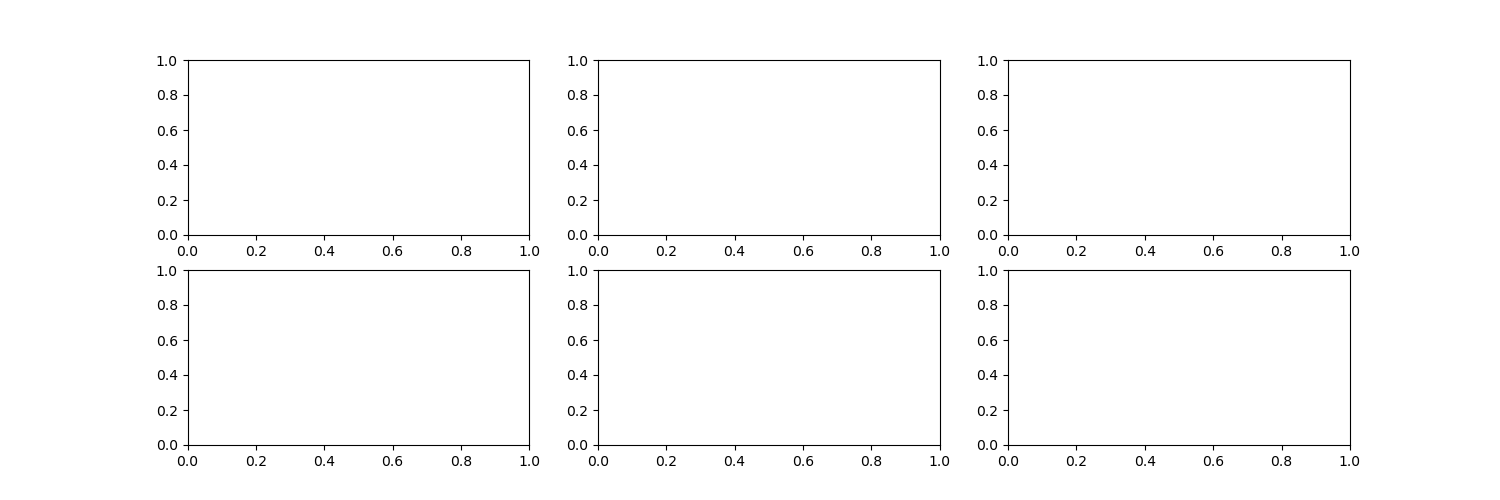

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

In [5]:
top_left = axs[0, 0]
top_left.plot(x, y)
top_left.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis");

In [6]:
top_right = axs[0, 2]
top_right.plot(x, [-n for n in y])
top_right.set(title="Sample Simple Plot (opposite)", xlabel="x-axis", ylabel="y-axis");

In [7]:
middle_top = axs[0, 1]
middle_top.hist(2);
middle_top.set(title="Fixed value", xlabel="x-axis", ylabel="y-axis");

In [8]:
bottom_left = axs[1, 0]
bottom_left.plot(x, [-n for n in y]);
bottom_right = axs[1, 2]
bottom_right.plot(x, y);

In [9]:

middle_bottom = axs[1, 1]
middle_bottom.hist(np.random.randn(30));

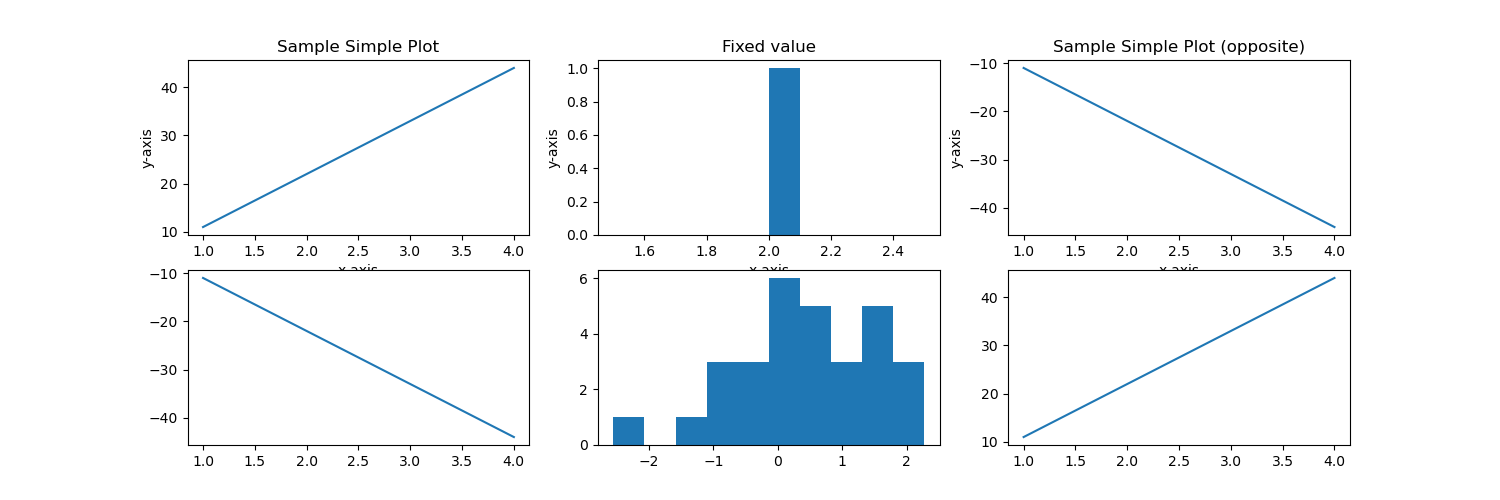

In [10]:
fig.show()

## Axeses destructuring

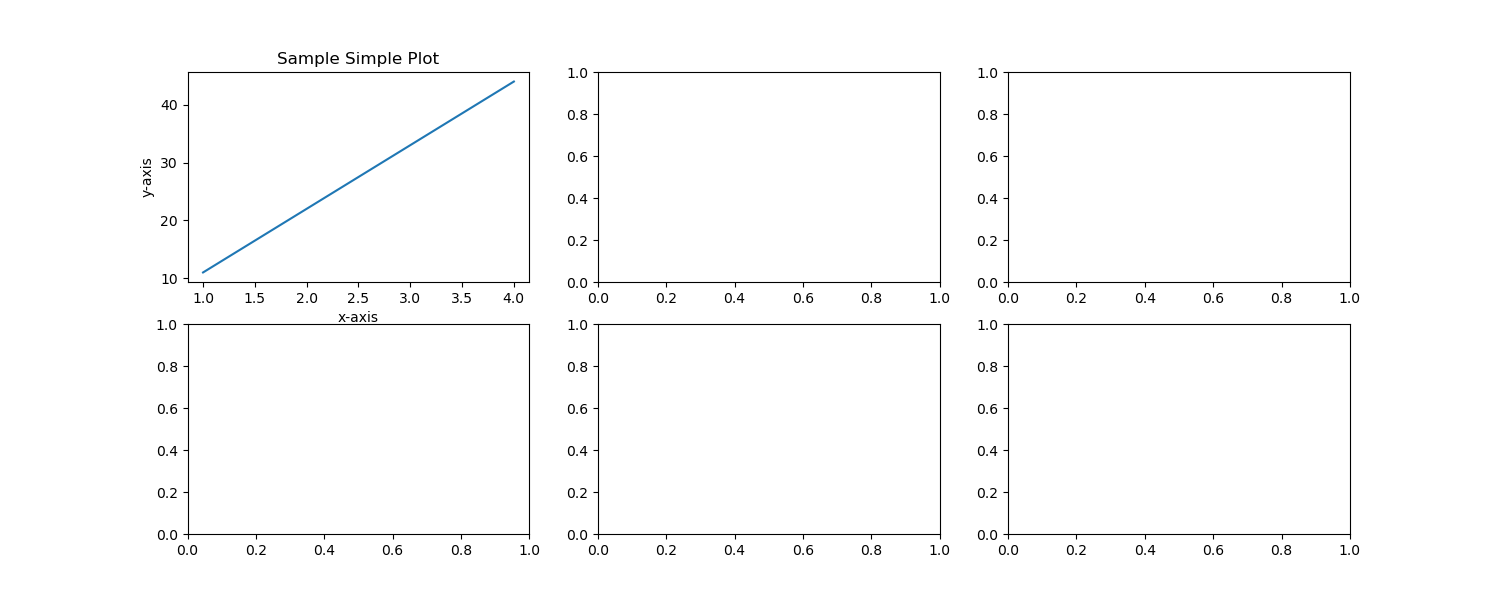

In [11]:
fig, ((top_left, middle_top, top_right), (bottom_left, middle_bottom, bottom_right)) = plt.subplots(nrows=2, 
                                             ncols=3, 
                                             figsize=(15, 6));

# Top Left
top_left.set_ylabel('y-vals')
top_left.set_xlabel('x-vals')
top_left.plot(x, y)
top_left.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis");

In [12]:
domain = np.random.randint(0, 20, 25)
domain.sort()
figure = np.square(domain)

In [13]:
middle_top.set_xlabel('domain')
middle_top.set_ylabel('figure')
middle_top.plot(domain, figure);

In [14]:
figure_n = pd.DataFrame(domain).apply(lambda x: x**x, axis=0)
top_right.plot(domain, figure_n);

In [15]:
bottom_left.bar(domain, figure);

In [16]:
middle_bottom.barh(domain, figure);

In [17]:
bottom_right.scatter(domain, figure);

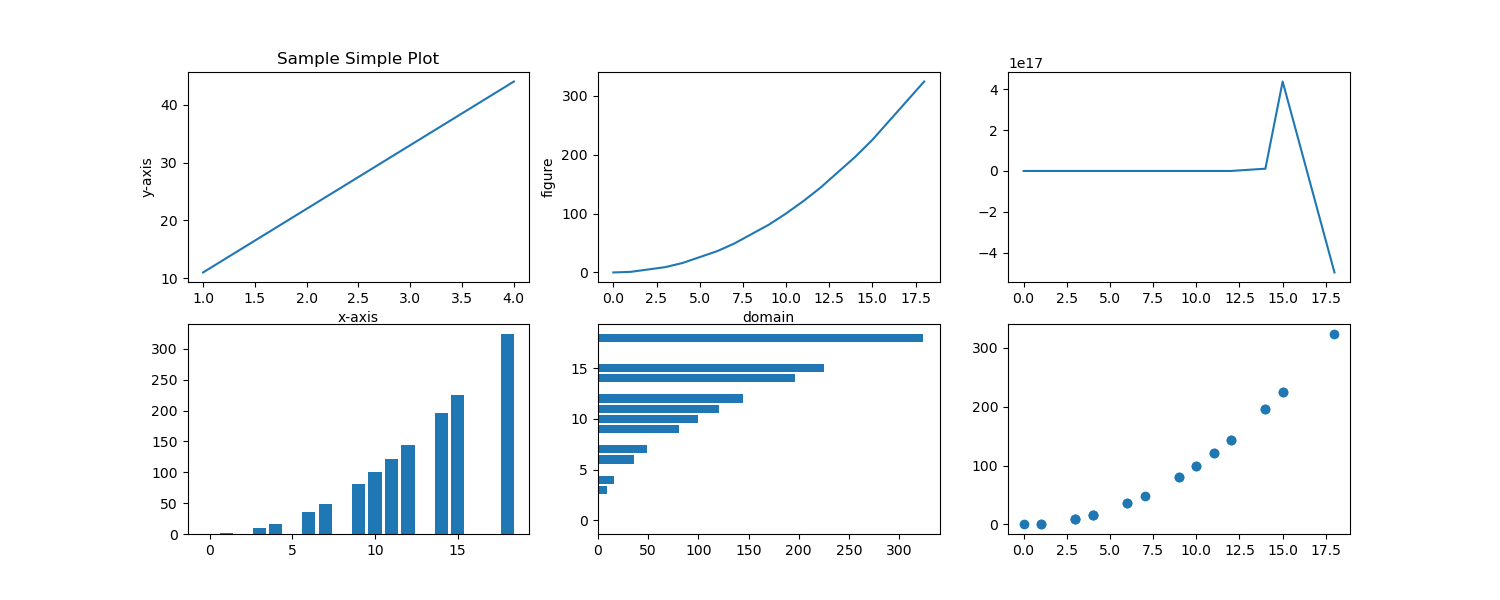

In [18]:
fig.show();

## Pandas

In [19]:
# Close previous figures!
plt.close()

<Axes: >

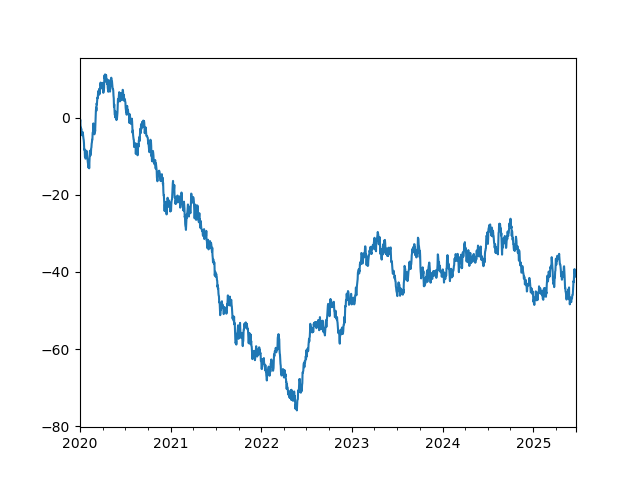

In [20]:
fig, ax = plt.subplots();


timeseries = pd.Series(np.random.randn(2000),
                        index=pd.date_range('01/01/2020', periods=2000))

timeseries.cumsum().plot()

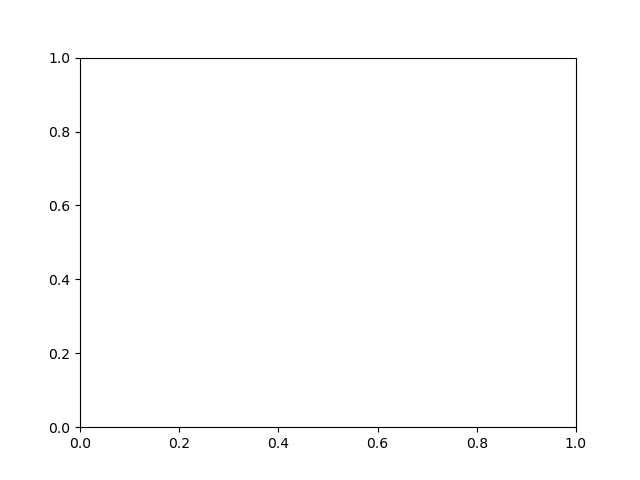

In [21]:
fig, ax = plt.subplots();
sales = pd.read_csv('./car-sales.csv')
sales["Price"] = sales["Price"].str.replace('[$,.]', '', regex=True)
sales['Price'] = sales['Price'].str[:-2].astype(int)
sales['Total Sales'] = sales['Price'].astype(int).cumsum();

# Add a sale date
sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(sales))

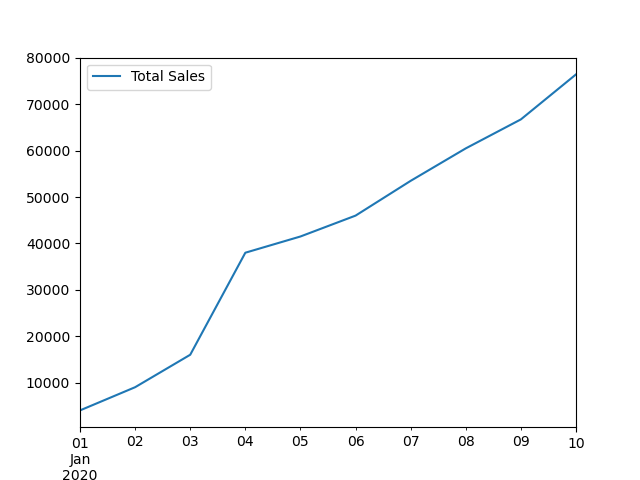

In [22]:
sales.plot(x='Sale Date', y='Total Sales');

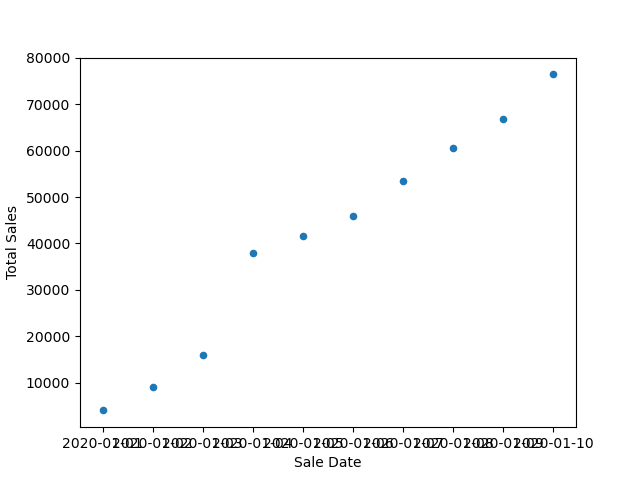

In [23]:
sales.plot(x='Sale Date', y='Total Sales', kind='scatter');

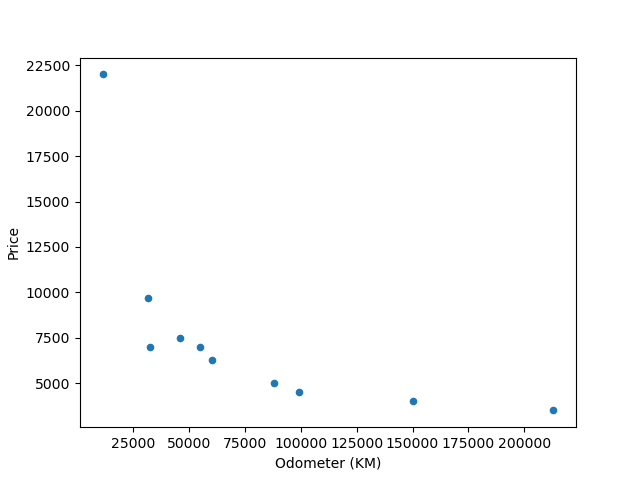

In [24]:
sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

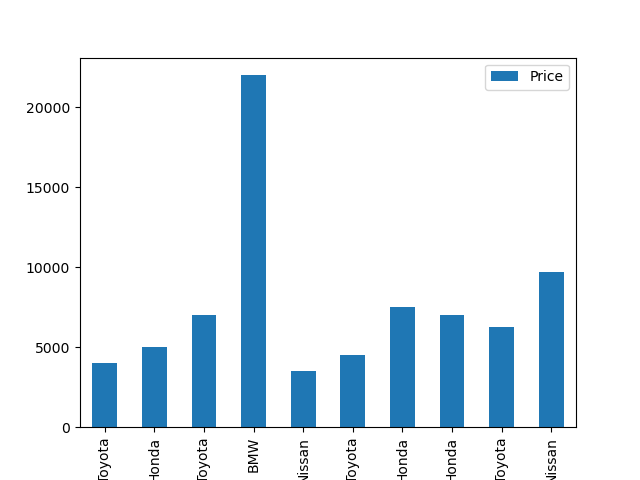

In [25]:
# sales.plot(x='Make', y='Price', kind='bar');    # Or...
sales.plot.bar(x='Make', y='Price');

## Heart Disease

In [3]:
hd = pd.read_csv('./heart-disease.csv')

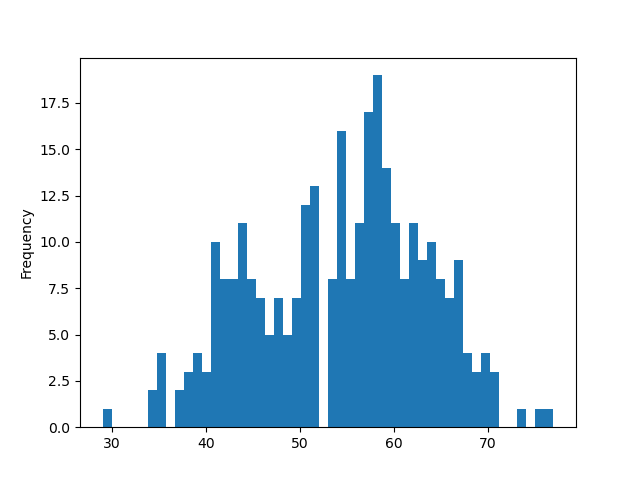

In [4]:
# See how age is distributed in the dataset
hd['age'].plot.hist(bins=50);

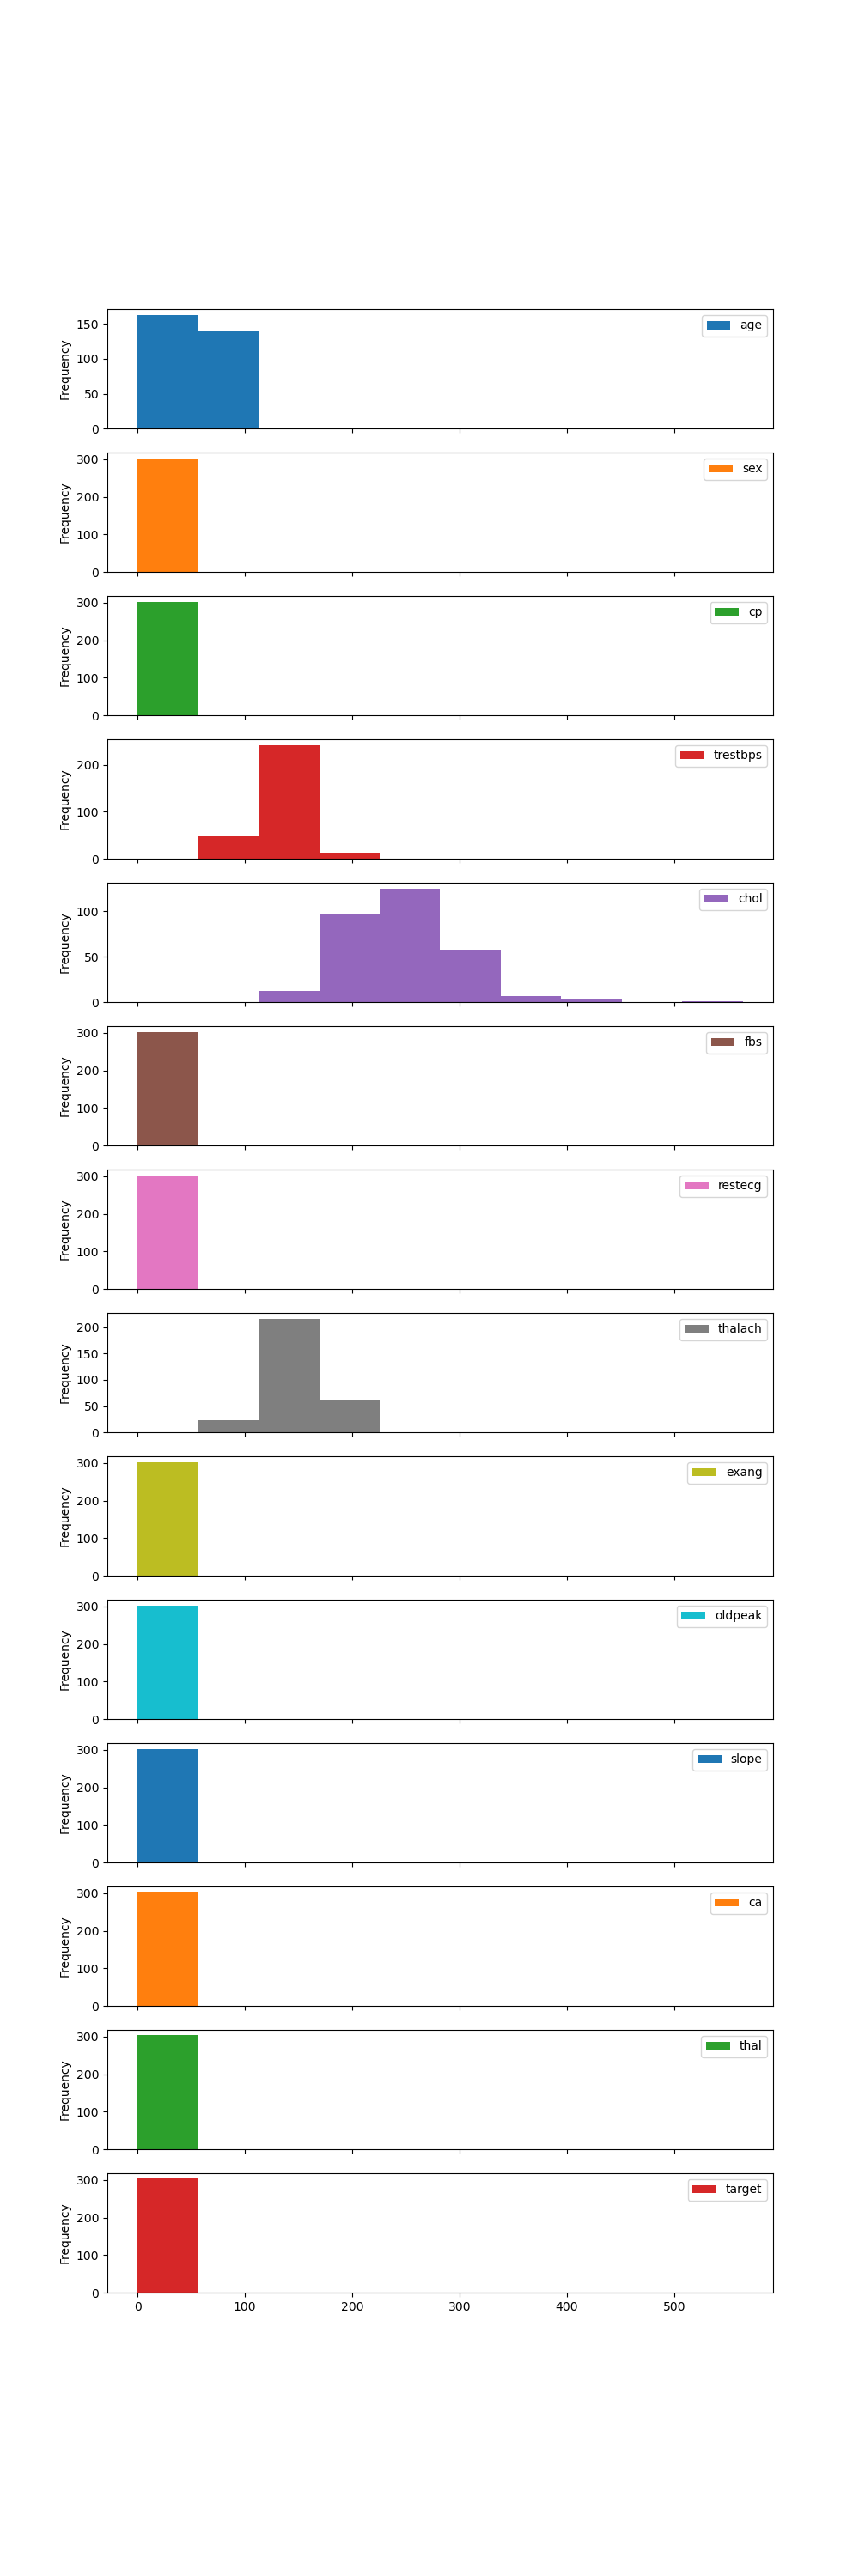

In [5]:
hd.plot.hist(subplots=True, figsize=(10, 30));       # Dreadful visualization! The Pyploy method is great for quick visualizations

## Object-Oriented API

In [4]:
# Pyplot API
over_50 = hd[hd['age'] > 50]


In [ ]:
over_50.plot(kind='scatter', x='age', y='chol', c='target');

/tmp/ipykernel_7764/3762542492.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6));


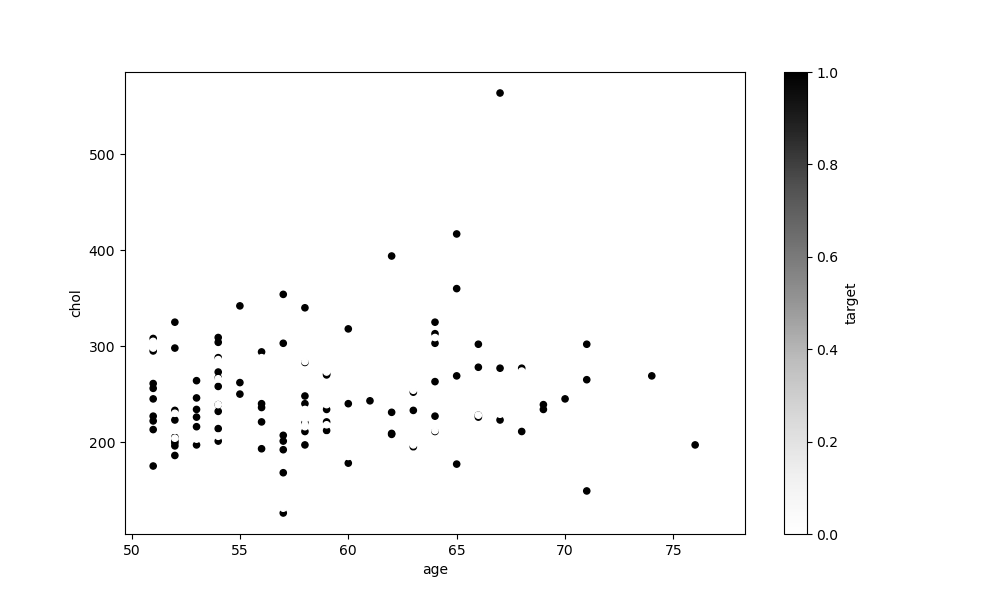

In [47]:
# OO API + Pyplot combined
fig, ax = plt.subplots(figsize=(10, 6));
over_50.plot(kind='scatter', x='age', y='chol', c='target', ax=ax);
# ax.set_xlim(left=45, right=60)

In [5]:
for n in range(20):
    plt.close()


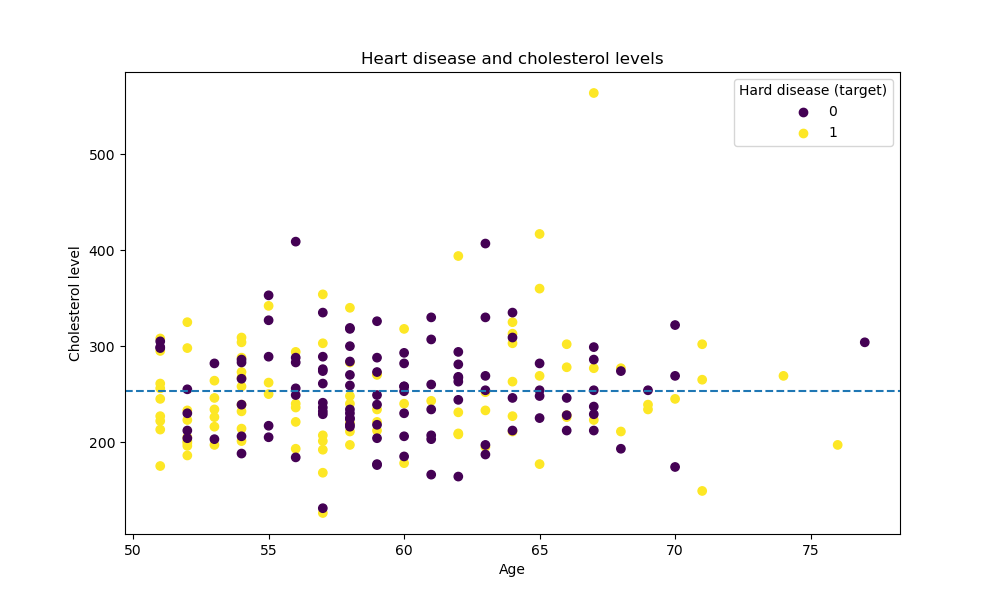

In [66]:
# OO API
fig, ax = plt.subplots(figsize=(10, 6));

# Plot
scatter = ax.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target']);

# Customize
ax.set(title="Heart disease and cholesterol levels",
       xlabel="Age",
       ylabel="Cholesterol level");

# Legend
ax.legend(*scatter.legend_elements(), title='Heart disease (target)')

# Add average cholesterol as horizontal line
ax.axhline(y=over_50['chol'].mean(), linestyle='--');

In [67]:
plt.close()

In [76]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

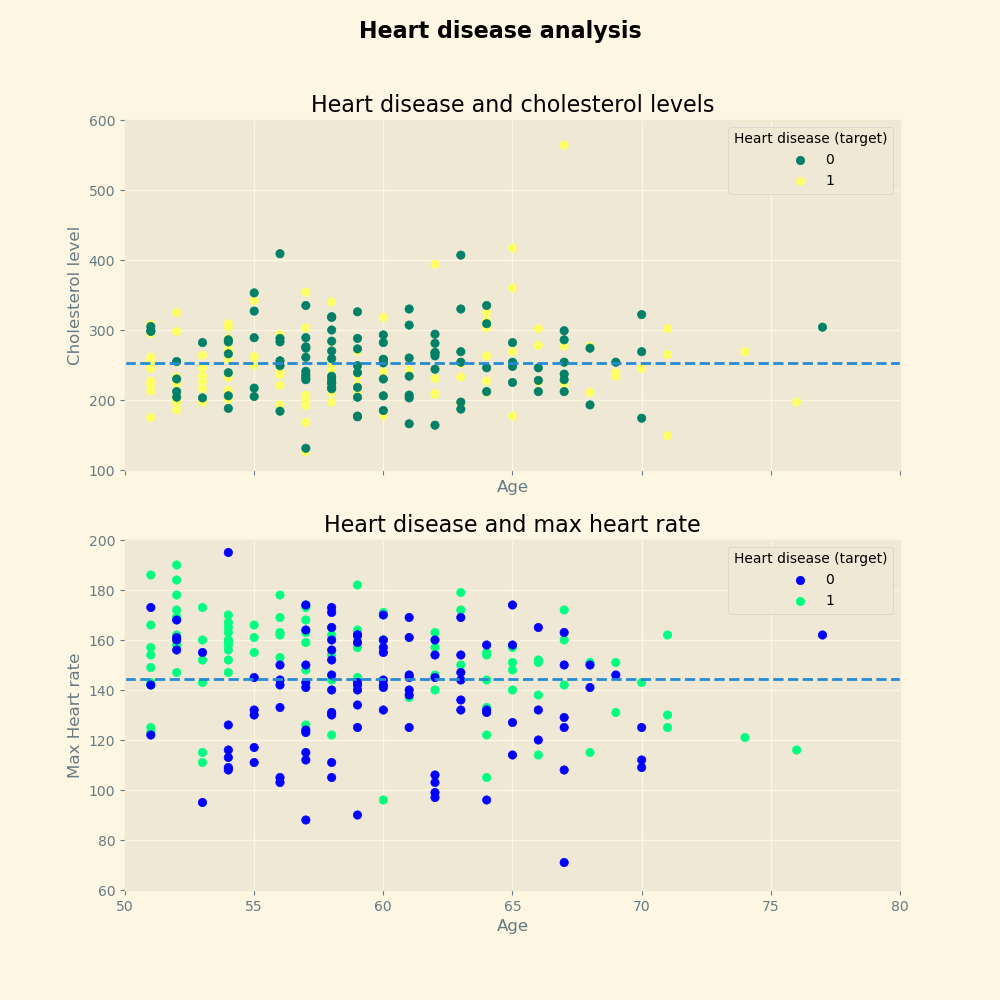

In [22]:
plt.style.use('Solarize_Light2')

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                               figsize=(10, 10),
                              sharex=True);

fig.suptitle(t="Heart disease analysis", fontsize=16, fontweight='bold');



# Plot
scatter_chol = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'], cmap='summer');
scatter_thalach = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target'], cmap='winter');

# Customize
ax0.set(title="Heart disease and cholesterol levels",
       xlabel="Age",
       ylabel="Cholesterol level");
ax0.set_xlim(left=50, right=80);
ax0.set_ylim(top=600, bottom=100);

ax1.set(title="Heart disease and max heart rate",
       xlabel="Age",
       ylabel="Max Heart rate");
# ax1.set_xlim(left=50, right=80);    # Not strictly necessary since both axes share the x!
ax1.set_ylim(top=200, bottom=60);

# Legend
ax0.legend(*scatter_chol.legend_elements(), title='Heart disease (target)')
ax1.legend(*scatter_thalach.legend_elements(), title='Heart disease (target)')

# Add average cholesterol as horizontal line
ax0.axhline(y=over_50['chol'].mean(), linestyle='--');
ax1.axhline(y=over_50['thalach'].mean(), linestyle='--');

## Styles